In [2]:
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import networkx as nx
import ast

C:\Users\I6240624\AppData\Local\Temp\ipykernel_14360\3537453158.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#read in Instagram data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_en_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_ins = csv.reader(f, delimiter=',')
    rows_ins_en = list(reader_ins)
    #read in Instagram data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_nl_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_ins = csv.reader(f, delimiter=',')
    rows_ins_nl = list(reader_ins)

In [4]:
 #read in TikTok data ENGLISH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_en_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_tt = csv.reader(f, delimiter=',')
    rows_tt_en = list(reader_tt)
    #read in TikTok data DUTCH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_nl_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_tt = csv.reader(f, delimiter=',')
    rows_tt_nl = list(reader_tt)

In [10]:
 #read in TikTok data ENGLISH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_en_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_yt = csv.reader(f, delimiter=',')
    rows_yt_en = list(reader_yt)
    #read in TikTok data DUTCH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_nl_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_yt = csv.reader(f, delimiter=',')
    rows_yt_nl = list(reader_yt)

In [11]:
# Making the Instagram dataframe DUTCH
dfins_nl = pd.DataFrame(rows_ins_nl)
# Making the first row the header
new_header = dfins_nl.iloc[0] 
dfins_nl = dfins_nl[1:]
dfins_nl.columns = new_header 

# Making the Instagram dataframe ENGLISH
dfins_en = pd.DataFrame(rows_ins_en)
# Making the first row the header
new_header = dfins_en.iloc[0] 
dfins_en = dfins_en[1:]
dfins_en.columns = new_header 

In [12]:
# Making the TikTok dataframe DUTCH
dftt_nl = pd.DataFrame(rows_tt_nl)
# Making the first row the header
new_header = dftt_nl.iloc[0] 
dftt_nl = dftt_nl[1:]
dftt_nl.columns = new_header 


# Making the TikTok dataframe ENGLISH
dftt_en = pd.DataFrame(rows_tt_en)
# Making the first row the header
new_header = dftt_en.iloc[0] 
dftt_en = dftt_en[1:]
dftt_en.columns = new_header 

In [13]:
# Making the YouTube dataframe DUTCH
dfyt_nl = pd.DataFrame(rows_yt_nl)
# Making the first row the header
new_header = dfyt_nl.iloc[0] 
dfyt_nl = dfyt_nl[1:]
dfyt_nl.columns = new_header 


# Making the YouTube dataframe ENGLISH
dfyt_en = pd.DataFrame(rows_yt_en)
# Making the first row the header
new_header = dfyt_en.iloc[0] 
dfyt_en = dfyt_en[1:]
dfyt_en.columns = new_header 

In [14]:
# Listing all the username for the Instagram Dataset ENGLISH
dfins_en['username'] = dfins_en['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
insinf_en = set(dfins_en['username'].unique())

# Listing all the username for the Instagram Dataset DUTCH
dfins_nl['username'] = dfins_nl['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
insinf_nl = set(dfins_nl['username'].unique())

# Listing all the username for the TikTok Dataset ENGLISH
dftt_en['username'] = dftt_en['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ttinf_en = set(dftt_en['username'].unique())

# Listing all the username for the TikTok Dataset DUTCH
dftt_nl['username'] = dftt_nl['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ttinf_nl = set(dftt_nl['username'].unique())

# Listing all the username for the Instagram Dataset ENGLISH
dfyt_en['username'] = dfyt_en['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ytinf_en = set(dfyt_en['username'].unique())

# Listing all the username for the Instagram Dataset DUTCH
dfyt_nl['username'] = dfyt_nl['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ytinf_nl = set(dfyt_nl['username'].unique())

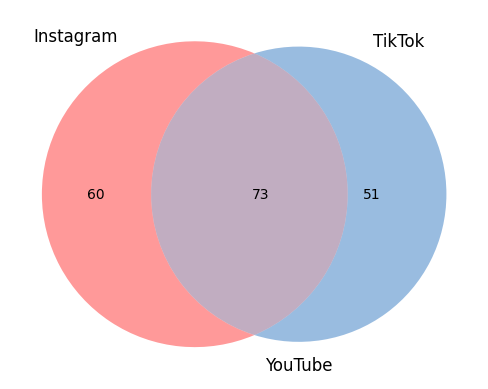

In [16]:
# Find common elements between lists
common_in_1_and_2 = insinf_en.intersection(ttinf_en)
common_in_1_and_3 = insinf_en.intersection(ytinf_en)
common_in_2_and_3 = ttinf_en.intersection(ytinf_en)

# Merge all common elements
all_common_elements = common_in_1_and_2.union(common_in_1_and_3, common_in_2_and_3)

# Create a dictionary to store the count of lists in which each name is present
name_presence_count = {}

# Check for each common element in the lists and update the count
for name in all_common_elements:
    count = 0
    if name in insinf_en:
        count += 1
    if name in ttinf_en:
        count += 1
    if name in ytinf_en:
        count += 1
    name_presence_count[name] = count
    
# Create a Dataframe for the names and counts
dfrep = pd.DataFrame(list(name_presence_count.items()), columns=['Name', 'Count'])

# Plot using a Venn Diagram
venn3([insinf_en, ttinf_en, ytinf_en], ('Instagram', 'TikTok', 'YouTube'))
plt.show()

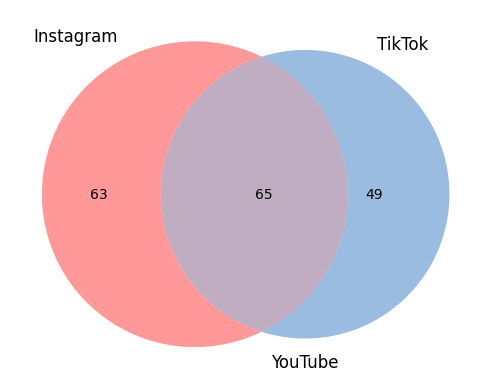

In [17]:
# Find common elements between lists
common_in_1_and_2 = insinf_nl.intersection(ttinf_nl)
common_in_1_and_3 = insinf_nl.intersection(ytinf_nl)
common_in_2_and_3 = ttinf_nl.intersection(ytinf_nl)

# Merge all common elements
all_common_elements = common_in_1_and_2.union(common_in_1_and_3, common_in_2_and_3)

# Create a dictionary to store the count of lists in which each name is present
name_presence_count = {}

# Check for each common element in the lists and update the count
for name in all_common_elements:
    count = 0
    if name in insinf_nl:
        count += 1
    if name in ttinf_nl:
        count += 1
    if name in ytinf_nl:
        count += 1
    name_presence_count[name] = count
    
# Create a Dataframe for the names and counts
dfrep = pd.DataFrame(list(name_presence_count.items()), columns=['Name', 'Count'])

# Plot using a Venn Diagram
venn3([insinf_nl, ttinf_nl, ytinf_nl], ('Instagram', 'TikTok', 'YouTube'))
plt.show()